In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt              #for plotting and EDA
import seaborn as sns                        #for plotting and Eda
from sklearn.model_selection import train_test_split         #for splitting dataset into train and test
from sklearn.metrics import r2_score                         #for model evaluation
from sklearn.metrics import mean_squared_error               #for model evaluation
from sklearn.metrics import mean_absolute_error              #for checking model accuracy
from sklearn.linear_model import LinearRegression            #regression model
from sklearn.tree import DecisionTreeRegressor               #regression model
from sklearn.ensemble import RandomForestRegressor           #regression model
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score          #for cross validating model
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Olx1.csv')

In [3]:
df.head(50)

,Unnamed: 0,Brand,Model,Variant,Year,Fuel,Transmission,Km Driven,No. of Owners,Location,Price
0,0,-,-,-,-,-,-,-,-,-,-
1,1,Maruti Suzuki,Ertiga,SHVS VDI Limited Edition,2017,Diesel,Manual,"73,000 km",2nd,"Vasai Road, Mumbai, Maharashtra","₹ 7,65,000"
2,2,Mercedes-Benz,E-Class,Others,2017,Diesel,-,"56,000 km",1st,"Krishi Mahavidyalaya, Pune, Maharashtra","₹ 44,00,000"
3,3,Honda,Civic,1.8 V MT,2007,CNG & Hybrids,Manual,"95,000 km",2nd,"Kharadi, Pune, Maharashtra","₹ 3,50,000"
4,4,Hyundai,Verna,CRDI VGT 1.5,2010,Diesel,Manual,"96,000 km",2nd,"Kalyan, Thane, Maharashtra","₹ 2,65,000"
5,5,Honda,City,i-VTEC V,2011,Petrol,Manual,"52,000 km",1st,"Vikhroli West, Mumbai, Maharashtra","₹ 3,50,000"
6,6,Maruti Suzuki,Ertiga,Ertiga 2018,2018,Diesel,Manual,94000.0 km,1st,"Pune Cantonment, Pune, Maharashtra","₹ 8,75,000"
7,7,Honda,Brio,2011-2013 V MT,2012,Petrol,Manual,66000.0 km,1st,"Tidke Colony, Nashik, Maharashtra","₹ 3,50,000"
8,8,Chevrolet,Aveo,1.4 LS,2007,Petrol,Manual,"76,000 km",2nd,"Dahisar East, Mumbai, Maharashtra","₹ 99,000"
9,9,Maruti Suzuki,Swift,2004-2010 VDI BSIV,2008,Diesel,Manual,"23,994 km",2nd,"Andheri East, Mumbai, Maharashtra","₹ 2,58,000"


In [4]:
df.shape

(2240, 11)

In [5]:
df.dtypes

Unnamed: 0        int64
Brand            object
Model            object
Variant          object
Year             object
Fuel             object
Transmission     object
Km Driven        object
No. of Owners    object
Location         object
Price            object
dtype: object

In [6]:
df.apply(lambda x: len(x.unique()))

Unnamed: 0       2240
Brand              35
Model             241
Variant          1009
Year               40
Fuel                6
Transmission        3
Km Driven         707
No. of Owners       6
Location         1426
Price             483
dtype: int64

In [7]:
df = df.replace('-', np.nan)

In [8]:
df.head(50)

,Unnamed: 0,Brand,Model,Variant,Year,Fuel,Transmission,Km Driven,No. of Owners,Location,Price
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Maruti Suzuki,Ertiga,SHVS VDI Limited Edition,2017,Diesel,Manual,"73,000 km",2nd,"Vasai Road, Mumbai, Maharashtra","₹ 7,65,000"
2,2,Mercedes-Benz,E-Class,Others,2017,Diesel,NaN,"56,000 km",1st,"Krishi Mahavidyalaya, Pune, Maharashtra","₹ 44,00,000"
3,3,Honda,Civic,1.8 V MT,2007,CNG & Hybrids,Manual,"95,000 km",2nd,"Kharadi, Pune, Maharashtra","₹ 3,50,000"
4,4,Hyundai,Verna,CRDI VGT 1.5,2010,Diesel,Manual,"96,000 km",2nd,"Kalyan, Thane, Maharashtra","₹ 2,65,000"
5,5,Honda,City,i-VTEC V,2011,Petrol,Manual,"52,000 km",1st,"Vikhroli West, Mumbai, Maharashtra","₹ 3,50,000"
6,6,Maruti Suzuki,Ertiga,Ertiga 2018,2018,Diesel,Manual,94000.0 km,1st,"Pune Cantonment, Pune, Maharashtra","₹ 8,75,000"
7,7,Honda,Brio,2011-2013 V MT,2012,Petrol,Manual,66000.0 km,1st,"Tidke Colony, Nashik, Maharashtra","₹ 3,50,000"
8,8,Chevrolet,Aveo,1.4 LS,2007,Petrol,Manual,"76,000 km",2nd,"Dahisar East, Mumbai, Maharashtra","₹ 99,000"
9,9,Maruti Suzuki,Swift,2004-2010 VDI BSIV,2008,Diesel,Manual,"23,994 km",2nd,"Andheri East, Mumbai, Maharashtra","₹ 2,58,000"


In [9]:
df.isnull().sum()

Unnamed: 0         0
Brand             47
Model             47
Variant          114
Year              47
Fuel              74
Transmission      95
Km Driven         47
No. of Owners     96
Location          47
Price             47
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.shape

(2063, 11)

In [12]:
df['Price'] = df['Price'].apply(lambda x: x[2:])
df['Km Driven'] = df['Km Driven'].apply(lambda x: x[:-3])
df['Price'] = df['Price'].str.replace(",","").astype(float)
df['Km Driven'] = df['Km Driven'].str.replace(",","").astype(float)

In [13]:
new = df['Location'].str.rsplit(", ", n = 2, expand = True)

In [14]:
new

,0,1,2
1,Vasai Road,Mumbai,Maharashtra
3,Kharadi,Pune,Maharashtra
4,Kalyan,Thane,Maharashtra
5,Vikhroli West,Mumbai,Maharashtra
6,Pune Cantonment,Pune,Maharashtra
...,...,...,...
2235,Balliwala,Dehradun,Uttaranchal
2236,Haldwani Talli,Haldwani,Uttaranchal
2237,Dhakrani,Herbertpur,Uttaranchal
2238,Banwaha,Doiwala,Uttaranchal


In [15]:
df['City'] = new[1]
df['State'] = new[2]
df.drop(columns =['Location'], inplace = True)

In [16]:
df.head(50)

,Unnamed: 0,Brand,Model,Variant,Year,Fuel,Transmission,Km Driven,No. of Owners,Price,City,State
1,1,Maruti Suzuki,Ertiga,SHVS VDI Limited Edition,2017,Diesel,Manual,73000.0,2nd,765000.0,Mumbai,Maharashtra
3,3,Honda,Civic,1.8 V MT,2007,CNG & Hybrids,Manual,95000.0,2nd,350000.0,Pune,Maharashtra
4,4,Hyundai,Verna,CRDI VGT 1.5,2010,Diesel,Manual,96000.0,2nd,265000.0,Thane,Maharashtra
5,5,Honda,City,i-VTEC V,2011,Petrol,Manual,52000.0,1st,350000.0,Mumbai,Maharashtra
6,6,Maruti Suzuki,Ertiga,Ertiga 2018,2018,Diesel,Manual,94000.0,1st,875000.0,Pune,Maharashtra
7,7,Honda,Brio,2011-2013 V MT,2012,Petrol,Manual,66000.0,1st,350000.0,Nashik,Maharashtra
8,8,Chevrolet,Aveo,1.4 LS,2007,Petrol,Manual,76000.0,2nd,99000.0,Mumbai,Maharashtra
9,9,Maruti Suzuki,Swift,2004-2010 VDI BSIV,2008,Diesel,Manual,23994.0,2nd,258000.0,Mumbai,Maharashtra
10,10,Skoda,Rapid,1.5 TDI CR Elegance Plus,2015,Diesel,Manual,118000.0,1st,525000.0,Karad,Maharashtra
11,11,Mahindra,Scorpio,S6,2015,Diesel,Manual,51000.0,1st,778000.0,Mumbai,Maharashtra


In [17]:
df['No. of Owners'].unique()

array(['2nd', '1st', '3rd', '4th', '4+'], dtype=object)

In [18]:
df['Year'].unique()

array(['2017', '2007', '2010', '2011', '2018', '2012', '2008', '2015',
       '2016', '2009', '2013', '2005', '2014', '2020', '2019', '2003',
       '2006', '1999', '2021', '2004', '2001', '1996', '2002', '2000',
       '1995', '2013.0', '1988', '1997', '2014.0', '1992', '1998', '1989',
       '1985', '1987', '1947', '1900', '1966', '2010.0'], dtype=object)

In [19]:
df['Year'].replace('2013.0', '2013', inplace = True)
df['Year'].replace('2014.0', '2014', inplace = True)
df['Year'].replace('2010.0', '2010', inplace = True)

In [20]:
df.apply(lambda x: len(x.unique()))

Unnamed: 0       2063
Brand              34
Model             238
Variant           988
Year               35
Fuel                5
Transmission        2
Km Driven         588
No. of Owners       5
Price             470
City              523
State              21
dtype: int64

Text(0.5, 0, 'Count of cars')

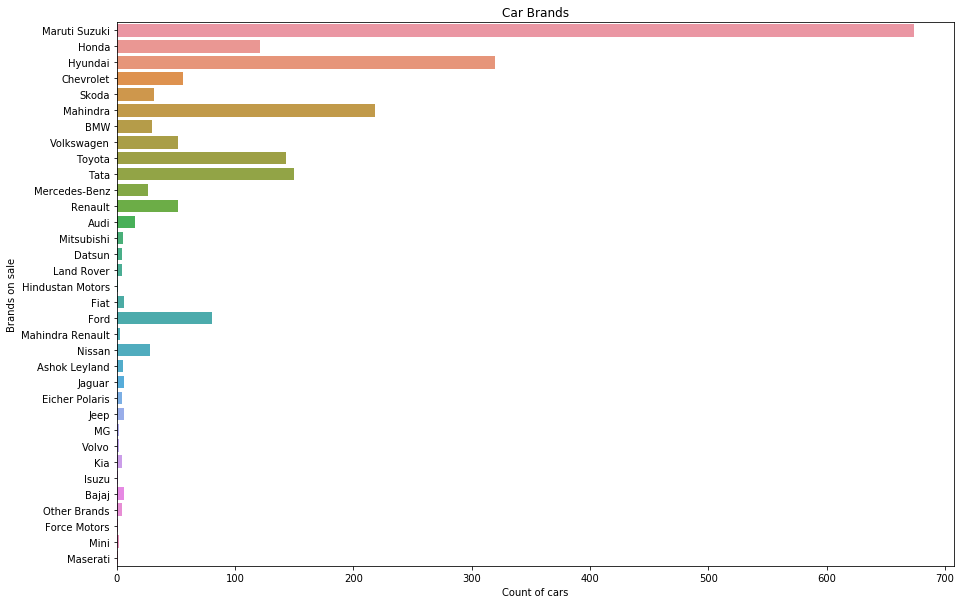

In [21]:
plt.figure(figsize = (15, 10))
plt.title('Car Brands')
ax = sns.countplot(y = 'Brand', data = df)
plt.ylabel('Brands on sale')
plt.xlabel('Count of cars')

Text(0.5, 0, 'Count of cars')

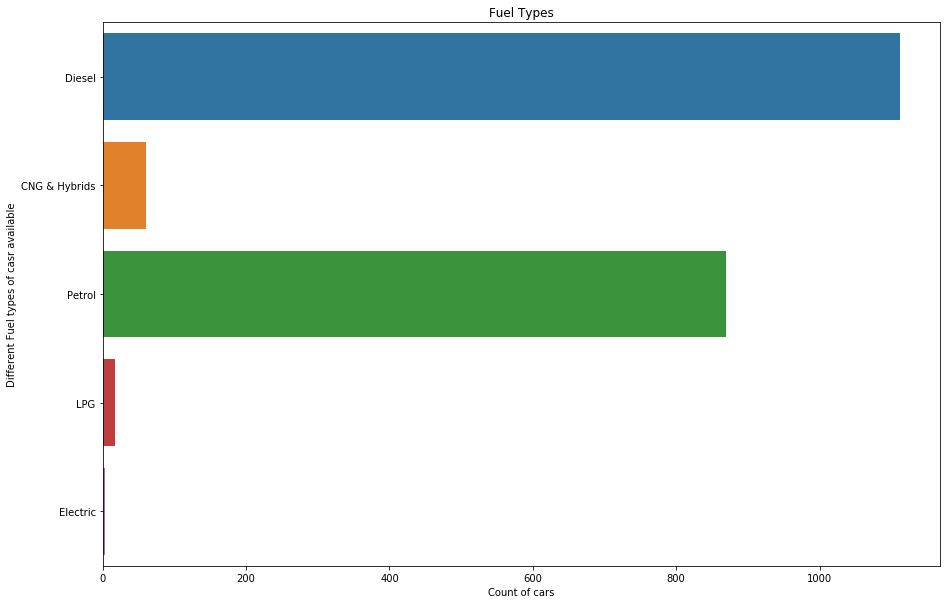

In [22]:
plt.figure(figsize = (15, 10))
plt.title('Fuel Types')
ax = sns.countplot(y = 'Fuel', data = df)
plt.ylabel('Different Fuel types of casr available')
plt.xlabel('Count of cars')

Text(0.5, 0, 'Count of cars')

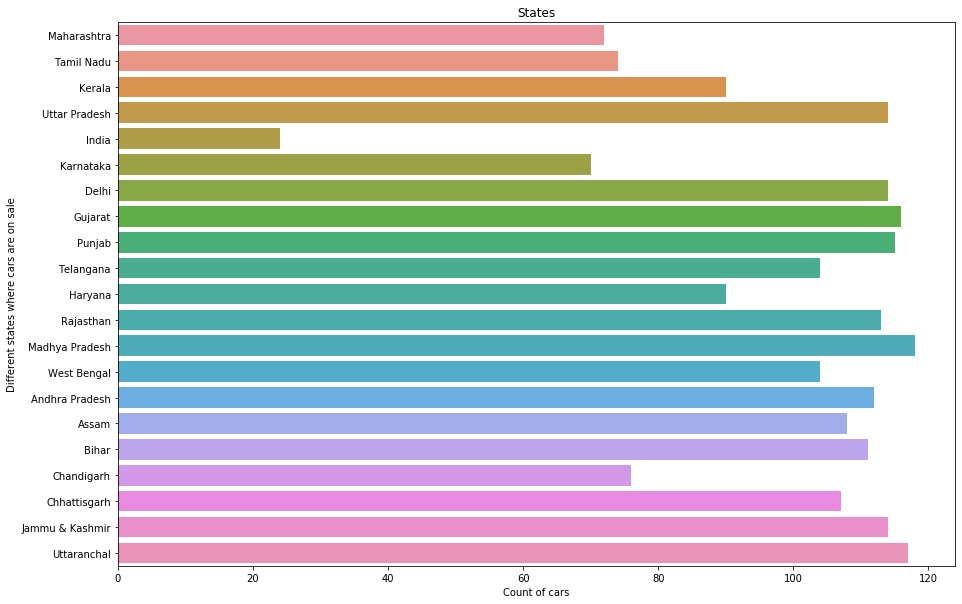

In [23]:
plt.figure(figsize = (15, 10))
plt.title('States')
ax = sns.countplot(y = 'State', data = df)
plt.ylabel('Different states where cars are on sale')
plt.xlabel('Count of cars')

In [24]:
df.loc[(df['State'] == 'India')]

,Unnamed: 0,Brand,Model,Variant,Year,Fuel,Transmission,Km Driven,No. of Owners,Price,City,State
349,349,Maruti Suzuki,Swift,Others,2019,Petrol,Manual,38000.0,1st,600000.0,Uttar Pradesh,India
752,752,Maruti Suzuki,Zen,LX,2003,Petrol,Manual,160284.0,4th,18000.0,Punjab,India
828,828,Maruti Suzuki,Alto,2005-2010 LXi BSIII,2010,Petrol,Manual,150000.0,2nd,145000.0,Punjab,India
830,830,Maruti Suzuki,Wagon R,2006-2010 LXI Minor,2006,Petrol,Manual,92054.0,2nd,125000.0,Punjab,India
1030,1030,Eicher Polaris,Others,Others,1992,Diesel,Manual,25000.0,2nd,80000.0,Haryana,India
1068,1068,Tata,Indica,LGI,2007,Petrol,Automatic,75000.0,1st,60000.0,Haryana,India
1077,1077,Tata,Indica E V2,Others,2007,Diesel,Automatic,75000.0,2nd,50000.0,Haryana,India
1157,1157,Mahindra,Bolero,2001-2010 DI DX 8 Seater,2016,Diesel,Manual,153000.0,1st,700000.0,Rajasthan,India
1197,1197,Chevrolet,Cruze,2010-2011 LT,2010,Diesel,Manual,50000.0,1st,250000.0,Rajasthan,India
1251,1251,Maruti Suzuki,Ritz,2009-2011 LDi,2010,Diesel,Automatic,95000.0,2nd,220000.0,Madhya Pradesh,India


In [25]:
df.loc[df.State == 'India', 'State'] = df['City']

Text(0.5, 0, 'Count of cars')

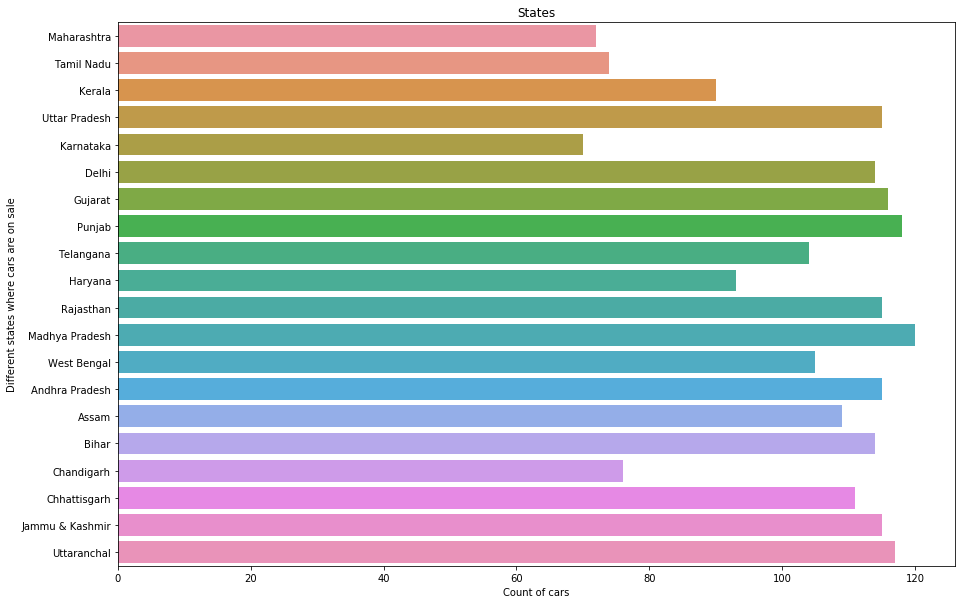

In [26]:
plt.figure(figsize = (15, 10))
plt.title('States')
ax = sns.countplot(y = 'State', data = df)
plt.ylabel('Different states where cars are on sale')
plt.xlabel('Count of cars')

Text(0.5, 0, 'Count of cars')

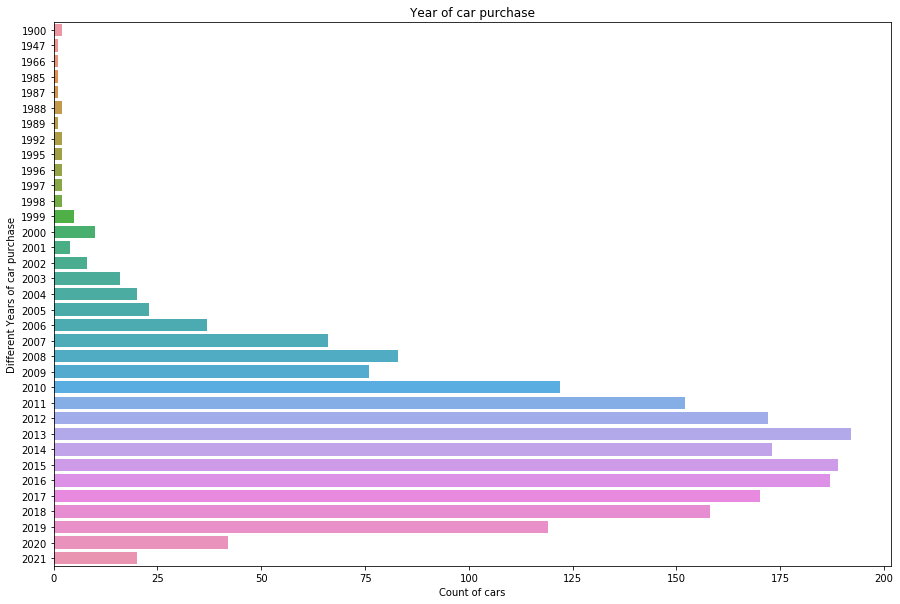

In [27]:
plt.figure(figsize = (15, 10))
plt.title('Year of car purchase')
ax = sns.countplot(y = 'Year', data = df)
plt.ylabel('Different Years of car purchase')
plt.xlabel('Count of cars')

Text(0.5, 0, 'Count of cars')

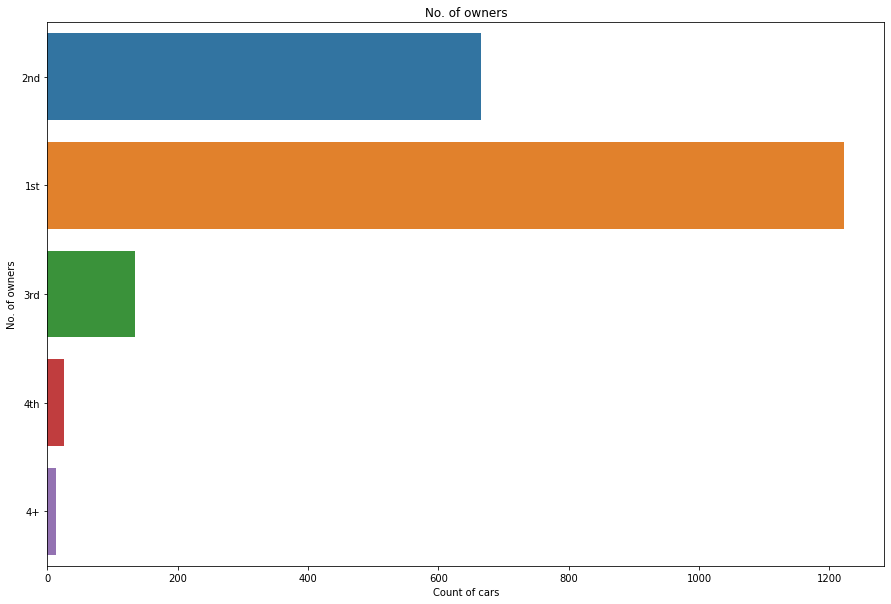

In [28]:
plt.figure(figsize = (15, 10))
plt.title('No. of owners')
ax = sns.countplot(y = 'No. of Owners', data = df)
plt.ylabel('No. of owners')
plt.xlabel('Count of cars')

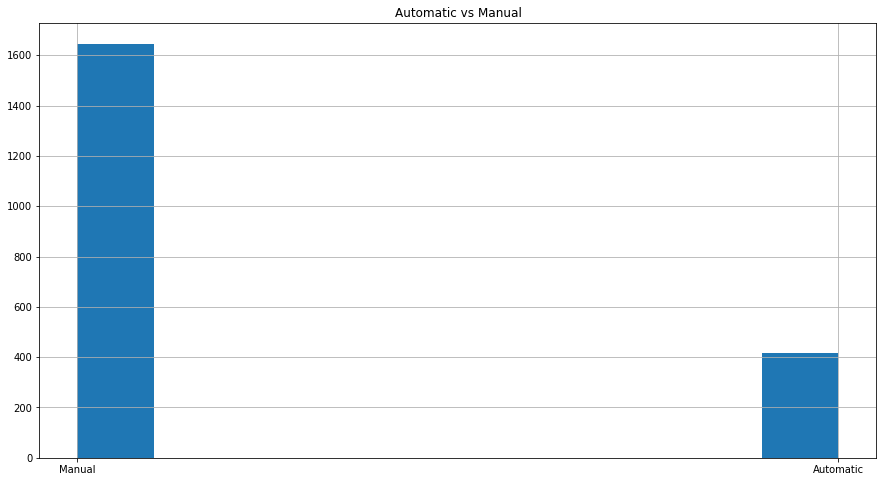

In [29]:
plt.figure(figsize = (15, 8))
df['Transmission'].hist(grid = True)
plt.title('Automatic vs Manual')
plt.show()

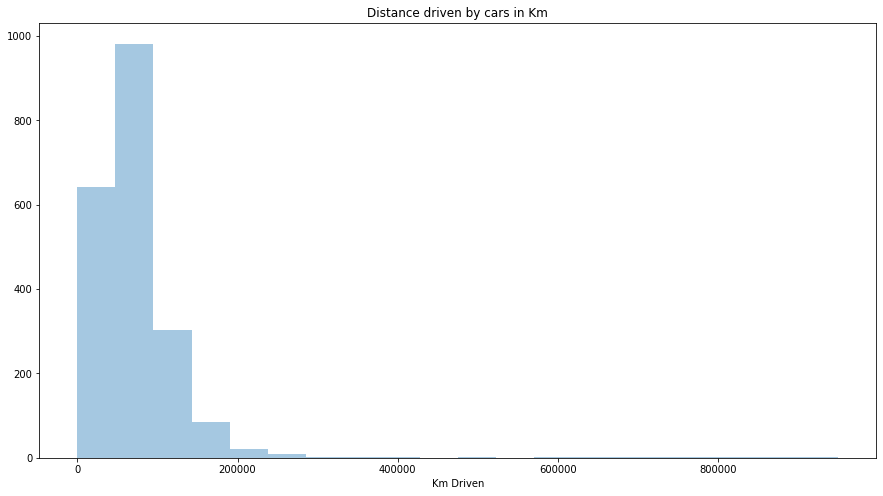

In [30]:
plt.figure(figsize = (15, 8))
sns.distplot(df['Km Driven'], bins = 20, kde = False)
plt.title('Distance driven by cars in Km')
plt.show()

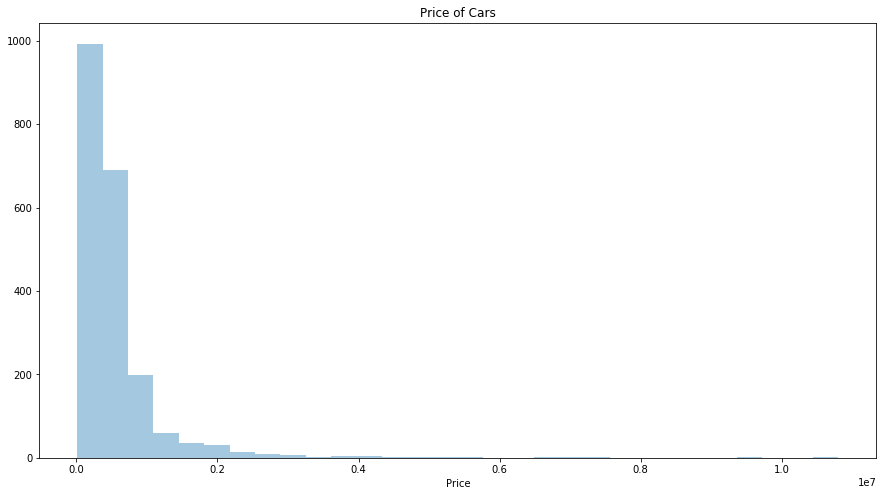

In [31]:
plt.figure(figsize = (15, 8))
sns.distplot(df['Price'], bins = 30, kde = False)
plt.title('Price of Cars')
plt.show()

In [32]:
feat = ['Brand', 'Fuel', 'Transmission', 'No. of Owners', 'State']

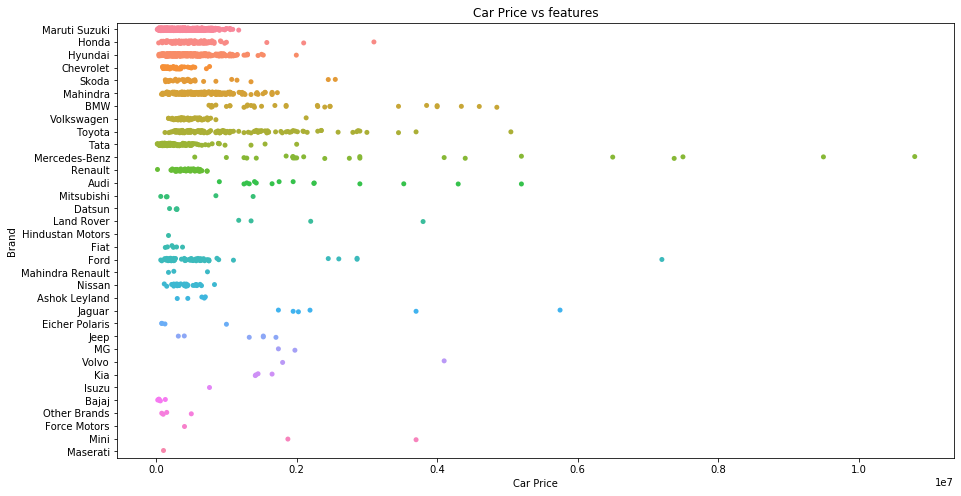

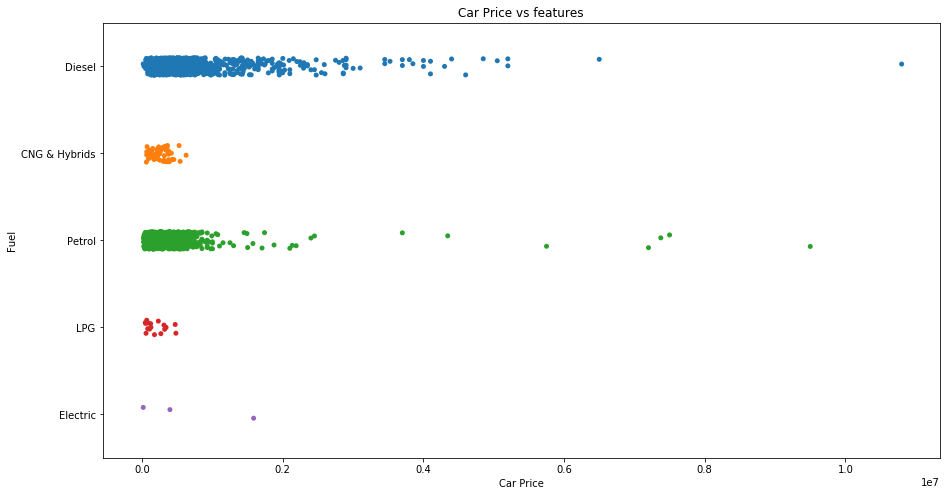

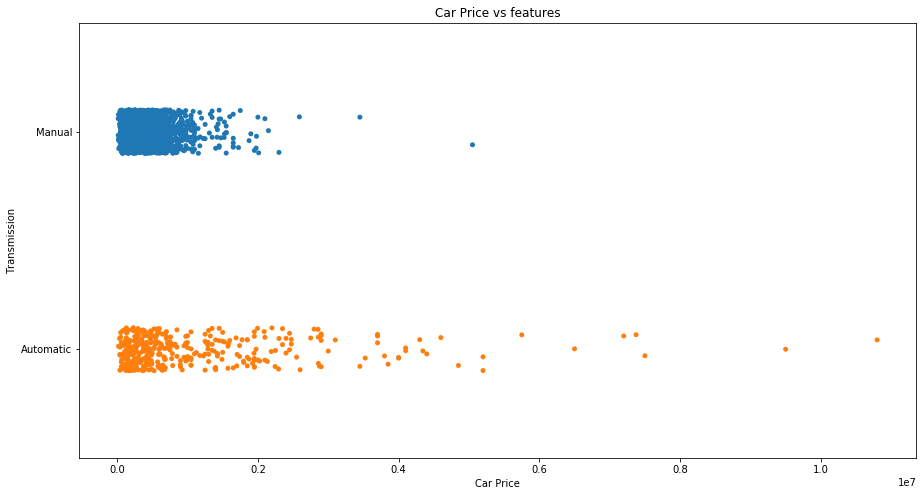

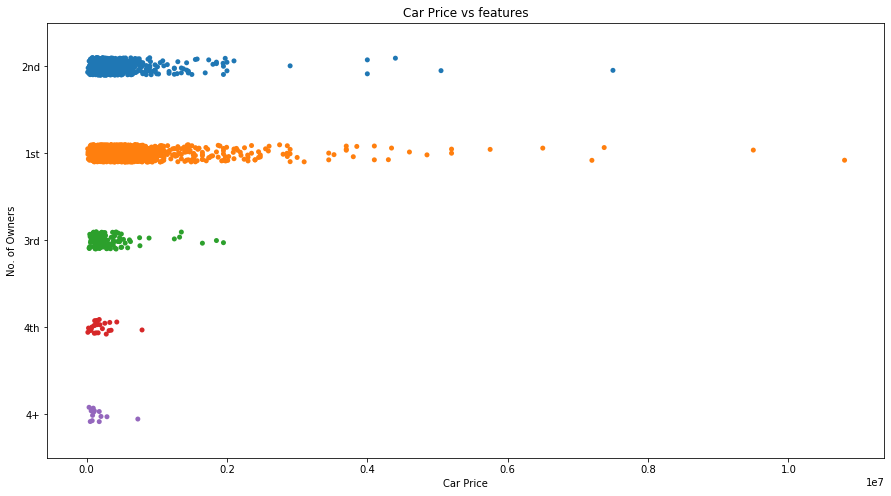

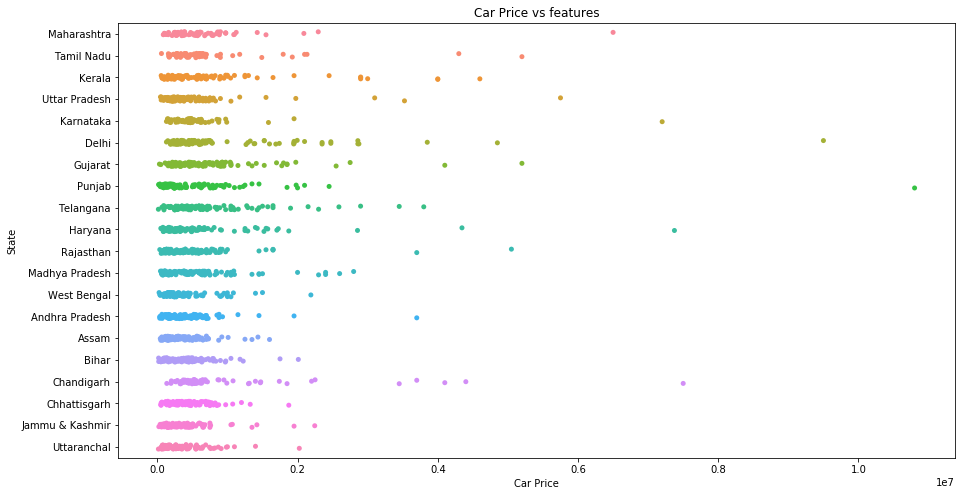

In [33]:
for i in df[feat]:                                #bivariate analysis
    plt.figure(figsize=(15, 8))
    plt.title('Car Price vs features')
    ax = sns.stripplot(df['Price'], df[i])
    ax.set(xlabel = 'Car Price', ylabel = i)
    plt.show()

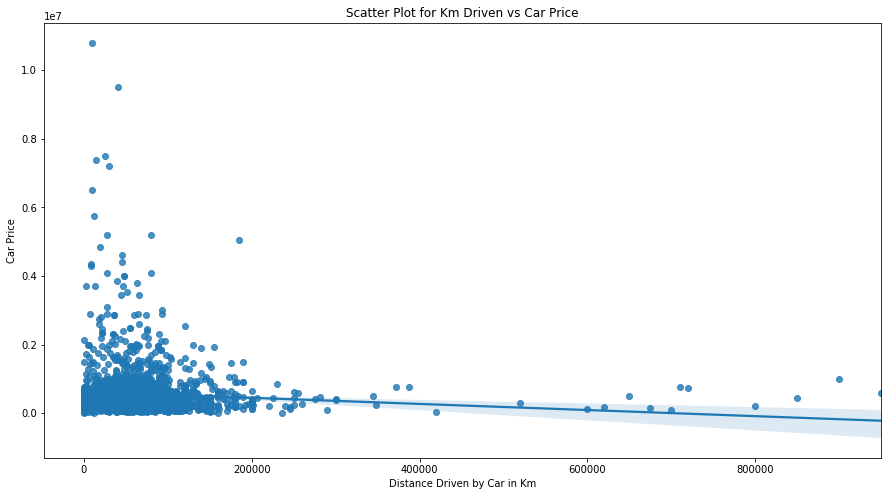

In [34]:
plt.figure(figsize = (15, 8))
sns.regplot(df['Km Driven'], df['Price'])
plt.title('Scatter Plot for Km Driven vs Car Price')
plt.xlabel('Distance Driven by Car in Km')
plt.ylabel('Car Price')  
plt.show()

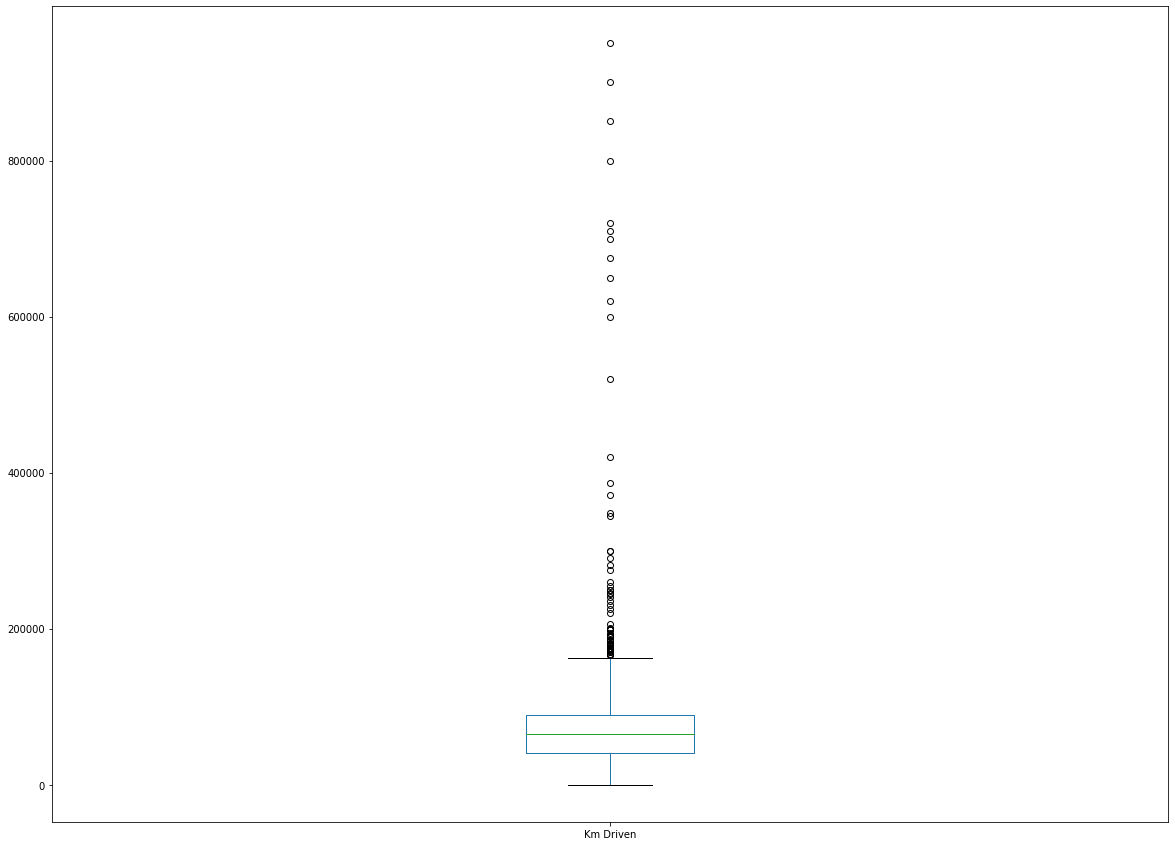

In [35]:
plt.figure(figsize = (20, 15))
df['Km Driven'].plot.box()

In [36]:
df['Km Driven'].skew()

6.262771362447869

In [37]:
df.dtypes

Unnamed: 0         int64
Brand             object
Model             object
Variant           object
Year              object
Fuel              object
Transmission      object
Km Driven        float64
No. of Owners     object
Price            float64
City              object
State             object
dtype: object

In [38]:
km_log = np.log(df['Km Driven'])

In [39]:
km_log.skew()

nan

In [40]:
km_sqrt = np.sqrt(df['Km Driven'])
km_sqrt.skew()

1.0332074484151812

In [43]:
df['Km Driven'] = np.sqrt(df['Km Driven'])

In [46]:
df['Km Driven'].skew()

1.0332074484151812

In [47]:
s = (df.dtypes == 'object')
cate_cols = list(s[s].index)

print("Categorical variables:")
print(cate_cols)

Categorical variables:
['Brand', 'Model', 'Variant', 'Year', 'Fuel', 'Transmission', 'No. of Owners', 'City', 'State']


In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in cate_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [50]:
df.dtypes

Unnamed: 0         int64
Brand              int32
Model              int32
Variant            int32
Year               int32
Fuel               int32
Transmission       int32
Km Driven        float64
No. of Owners      int32
Price            float64
City               int32
State              int32
dtype: object

In [51]:
x = df.drop('Price', axis = 1)
y = df['Price']

In [53]:
maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    r2 = r2_score(y_test, predrf)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.3515206735351478 on Random State 496


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = maxRS)

In [58]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred = LR.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.3515206735351478
174664727418.55536
281101.0717361328


In [59]:
ridge = Ridge(alpha=1)

In [60]:
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.35198645108959614
174539272517.73547
281006.706003407


In [61]:
alphas = np.logspace(5,-5,50)
ridgecv = RidgeCV(alphas=alphas)
ridgecv.fit(x_train, y_train)
pred = ridgecv.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.3538094476800032
174048257323.33563
280635.3789139719


In [62]:
lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.35152168346402546
174664455399.16333
281100.73868766404


In [63]:
lassocv = LassoCV(alphas=alphas)
lassocv.fit(x_train, y_train)
pred = lassocv.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.3548481822929175
173768479247.73535
279994.0727763202


In [64]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.5250075198802335
127936895873.39418
190569.15508885297


In [65]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
print (mean_absolute_error(y_test, pred))

0.6557787211603368
92714313913.37503
163706.9059450727


In [66]:
models = [LR, dt, rf]
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LinearRegression()  model is : 0.10980862079410114
 
Cross Validation Score for  DecisionTreeRegressor()  model is : 0.03530836547588845
 
Cross Validation Score for  RandomForestRegressor()  model is : 0.4072168898704098
 


In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

grid_cv_dt = GridSearchCV(dt, param_grid, cv=5)

grid_cv_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [69]:
grid_cv_dt.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 20}

In [70]:
gdt = DecisionTreeRegressor(criterion = 'mae', max_depth = 8, max_leaf_nodes = 100,
                            min_samples_leaf = 20, min_samples_split = 20)
gdt.fit(x_train, y_train)
predgdt = gdt.predict(x_test)
print (r2_score(y_test, predgdt))
print (mean_squared_error(y_test, predgdt))
print (mean_absolute_error(y_test, predgdt))

0.41718893046522787
156977304352.54684
206213.37964458804


In [71]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

grid_cv_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
grid_cv_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [72]:
grid_cv_rf.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [73]:
rfr = RandomForestRegressor(random_state = maxRS, max_features = 'auto',
                            n_estimators = 500, max_depth = 8, criterion='mse')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))
print (mean_absolute_error(y_test, predrfr))

0.6530296353677021
93454766694.2499
175411.0772104203


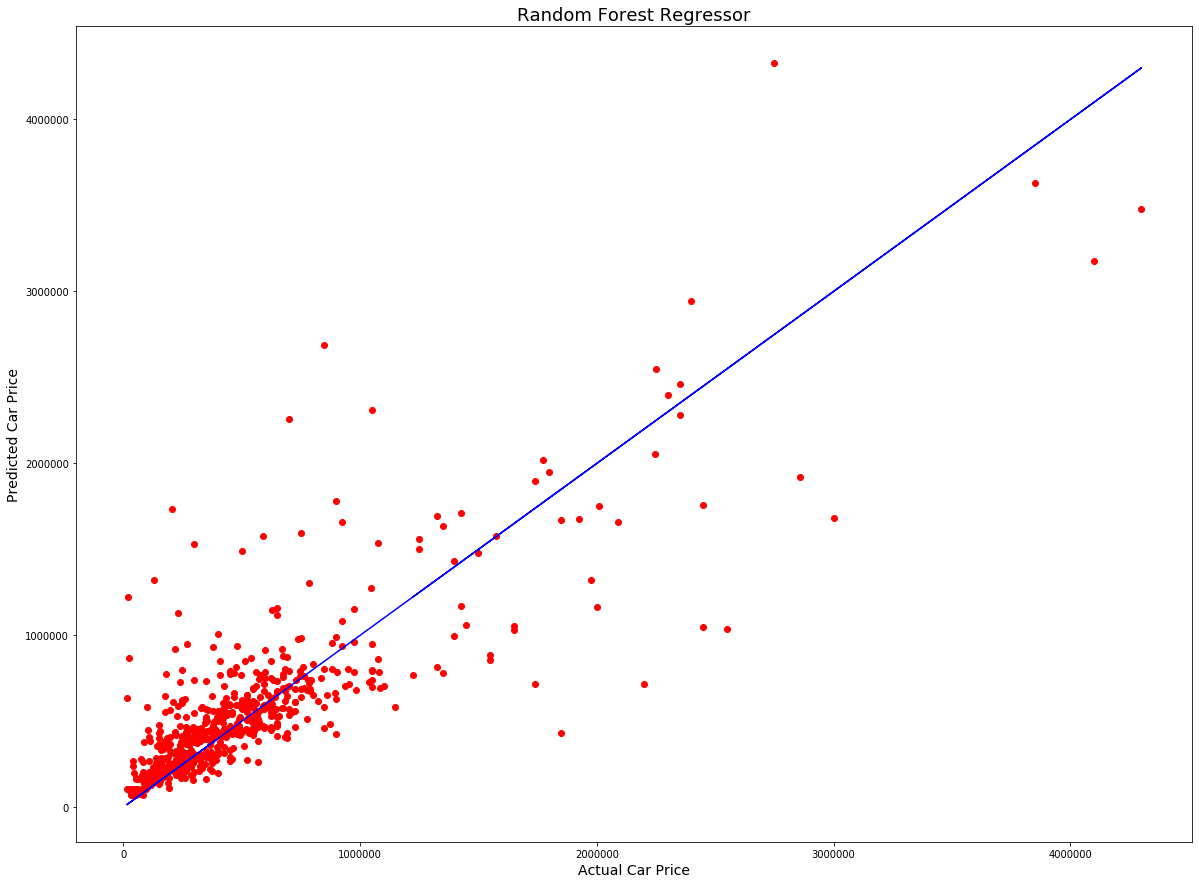

In [74]:
plt.figure(figsize = (20, 15))
plt.scatter(x = y_test, y = predrfr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Car Price', fontsize = 14)
plt.ylabel('Predicted Car Price', fontsize = 14)
plt.title('Random Forest Regressor', fontsize = 18)
plt.show()

In [75]:
import pickle

filename = 'Car Price Rfr.pkl'
pickle.dump(rfr, open(filename, 'wb'))